# Taller 1
## Isaac Arias, Bastian Alvarez

#### Funciones de verificacion para bibliotecas
Estas funciones son cuando no se encuentran instaladas las bibliotecas
y se instalan automaticamente


In [1]:
def verificacionPanda():
    try:
        import pandas as pd
        import openpyxl as op
    except ImportError:
        import subprocess
        import sys
        print("🔄 pandas no está instalado. Instalando Pandas, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
        subprocess.check_call([sys.executable,"pip", "install", "openpyxl"])
        print("✅ pandas instalado correctamente.")



def verificacionNumpy():
    try:
        import numpy as np
    except ImportError:
        import subprocess
        import sys
        print("🔄 numpy no está instalado. Instalando Numpy, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])
        import numpy as np
        print("✅ numpy instalado correctamente.")

def verificacionMatplotlib():
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        import subprocess
        import sys
        print("🔄 matplotlib no está instalado. Instalando matplotlib, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
        print("✅ matplotlib instalado correctamente.")

def verificacionScikitLearn():
    try:
        from sklearn.preprocessing import MinMaxScaler
        from sklearn.cluster import KMeans
    except ImportError:
        import subprocess
        import sys
        print("🔄 scikit-learn no está instalado. Instalando scikit-learn, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
        print("✅ scikit-learn instalado correctamente.")


def verificacionSeaborn():
    try:
        import seaborn as sns
    except ImportError:
        import subprocess
        import sys
        print("🔄 seaborn no está instalado. Instalando seaborn, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
        print("✅ seaborn instalado correctamente.")

def verificacionMlxtend():
    try:
        from mlxtend.preprocessing import TransactionEncoder
        from mlxtend.frequent_patterns import apriori, association_rules
        print("✅ mlxtend ya está instalado y listo para usar.")
    except ImportError:
        import subprocess
        import sys
        print("🔄 mlxtend no está instalado. Instalando mlxtend, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
        print("✅ mlxtend instalado correctamente.")



def importacionDeBibliotecasAutomaticas():
    verificacionPanda()
    verificacionNumpy()
    verificacionMatplotlib()
    verificacionScikitLearn()
    verificacionSeaborn()
    verificacionMlxtend()
importacionDeBibliotecasAutomaticas()

✅ mlxtend ya está instalado y listo para usar.


### Si tiene las depencencias instaladas ejecutar el codigo a continuacion


Este odigo es solo para separar los archivos e importaciones,
se toma por obiedad que los archivos csv y xlsx estaran en el mismo directorio que el archivo ipynb

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#se usa bravo como "B", charlie como "C" y delta como "D"
#archivos de codigos
archCodeDelta_Hoja1= pd.read_excel('Libro_CódigosADM2025_ArchivoD.xlsx', sheet_name="Postulación y Selección")
archCodeDelta_Hoja3= pd.read_excel('Libro_CódigosADM2025_ArchivoD.xlsx', sheet_name="Anexo -  Oferta académica")
archCodeCharlie_Hoja1= pd.read_excel('Libro_CódigosADM2025_ArchivoC.xlsx', sheet_name="Rinden")

#archivos de informacion importante
archBravo = 'ArchivoB_Adm2025.csv'
archDelta = 'ArchivoD_Adm2025.csv'
archCharlie = 'ArchivoC_Adm2025.csv'





datosBravo = pd.read_csv(archBravo,sep=";")
datosDelta = pd.read_csv(archDelta,sep=";")
datosCharlie = pd.read_csv(archCharlie,sep=";", low_memory=False)



### Actividad 1: Descripción del set de datos

En esta primera parte del taller se integraron los archivos B, C y D en un solo conjunto de datos utilizando `ID_aux` como clave principal.  
Luego, se filtró para mantener solo una postulación por estudiante (preferencia número 1).  

Se realizó el análisis exploratorio de variables:
- **Numérica:** `PTJE_NEM`, donde se observó su rango y dispersión.
- **Nominal:** `NOMBRE_UNIVERSIDAD`, representada gráficamente por distribución de postulaciones.
- **Ordinal:** `SITUACION_EGRESO_y`, que fue mapeada con etiquetas explicativas para su análisis con `countplot`.

Este análisis permitió conocer la composición general del dataset y características relevantes para los análisis posteriores.

In [3]:
datosBC = pd.merge(datosBravo,datosCharlie,on="ID_aux",how="left")
datosUnidos = pd.merge(datosBC,datosDelta,on="ID_aux",how="left")
datosUnidos.head()

# Primero nos aseguramos que ORDEN_PREF sea numérico
datosUnidos['ORDEN_PREF'] = pd.to_numeric(datosUnidos['ORDEN_PREF'], errors='coerce')

# Ahora seleccionamos la postulación de menor ORDEN_PREF (es decir, preferencia 1 si existe)
datosUnidos_filtrado = datosUnidos.sort_values(by=['ID_aux', 'ORDEN_PREF'])
temp = datosUnidos_filtrado #almaceno esto para la actividad 4
datosUnidos_filtrado.drop_duplicates(subset='ID_aux', keep='first') 

# Mostrar resultado
datosUnidos_filtrado.head()

,ID_aux,ANYO_PROCESO,FECHA_NACIMIENTO,RBD_x,COD_ENS_x,REGIMEN,RAMA_EDUCACIONAL_x,GRUPO_DEPENDENCIA_x,ANYO_EGRESO,CODIGO_REGION_x,...,MATE1_INV_ANTERIOR,MATE2_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR,ORDEN_PREF,COD_CARRERA_PREF,ESTADO_PREF,TIPO_PREF,PTJE_PREF
776917,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,1.0,50929.0,25.0,REGULAR,"603,5"
776918,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,2.0,41058.0,25.0,REGULAR,"616,4"
776919,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,3.0,50928.0,24.0,REGULAR,"580,1"
776920,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,4.0,41015.0,26.0,REGULAR,"563,1"
776921,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,5.0,44053.0,26.0,REGULAR,"607,8"


#### Variables numericas

min:  0.0
max:  1000.0
media:  619.322
desv estand:  200.139


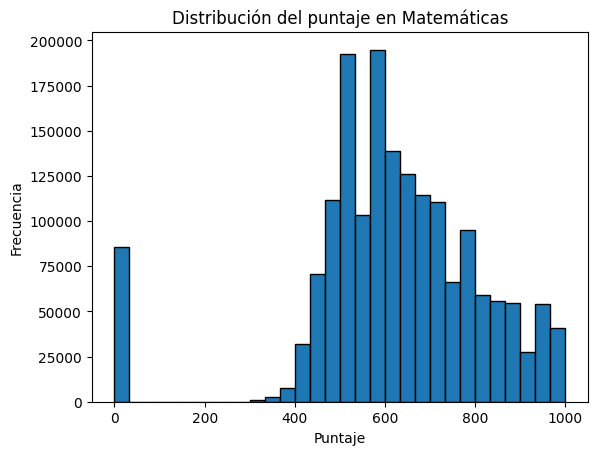

In [4]:
varNumerica = datosUnidos_filtrado["MATE1_REG_ACTUAL"]
print("min: " , varNumerica.min())
print("max: ", varNumerica.max())
print("media: ", round(varNumerica.mean(),3))
print("desv estand: ", round(varNumerica.std(),3) )


# Histograma
plt.hist(varNumerica, bins=30, edgecolor='black')
plt.title('Distribución del puntaje en Matemáticas')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

#### Variables Nominal

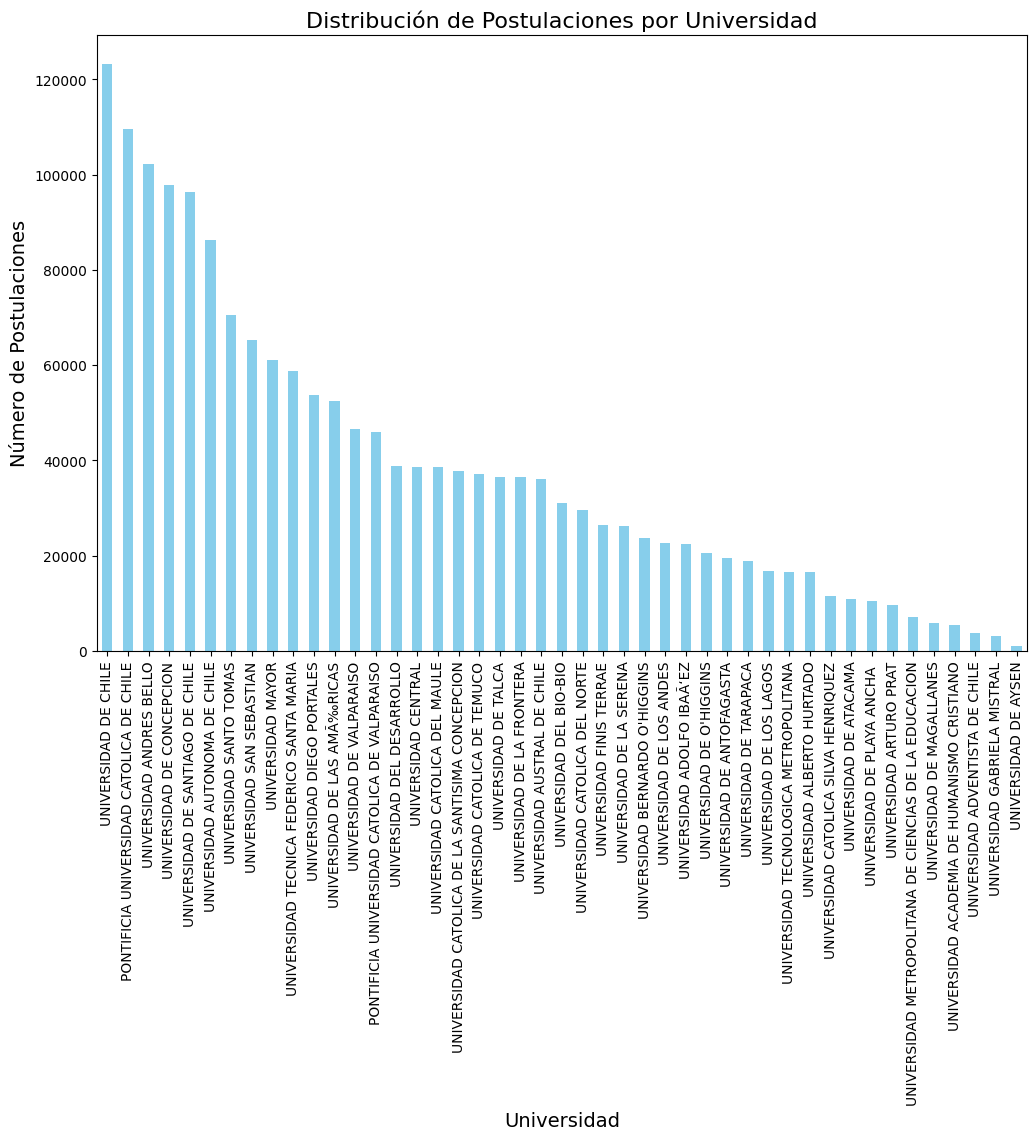

In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
NEMxCarrera = pd.merge(datosUnidos_filtrado,archCodeDelta_Hoja3 , left_on="COD_CARRERA_PREF", right_on="CODIGO_CARRERA", how="left")
columnasNecesarias = ["ID_aux","NOMBRE_UNIVERSIDAD", "PTJE_NEM", "NOMBRE_CARRERA"]
todasLasUniversidades = NEMxCarrera["NOMBRE_UNIVERSIDAD"].unique().tolist()
distribucion_postulaciones = NEMxCarrera['NOMBRE_UNIVERSIDAD'].value_counts()



plt.figure(figsize=(12, 8))  # Tamaño del gráfico
distribucion_postulaciones.plot(kind='bar', color='skyblue')  # Gráfico de barras
plt.title('Distribución de Postulaciones por Universidad', fontsize=16)
plt.xlabel('Universidad', fontsize=14)
plt.ylabel('Número de Postulaciones', fontsize=14)
plt.xticks(rotation=90)  # Gira las etiquetas de las universidades para que no se superpongan
plt.show()


#### Variable Ordinal


Análisis del atributo: SITUACION_EGRESO_y
SITUACION_EGRESO_y
1    1173812
5     664214
6       5948
8       4121
2       3679
7        453
3        145
4        109
Name: count, dtype: int64


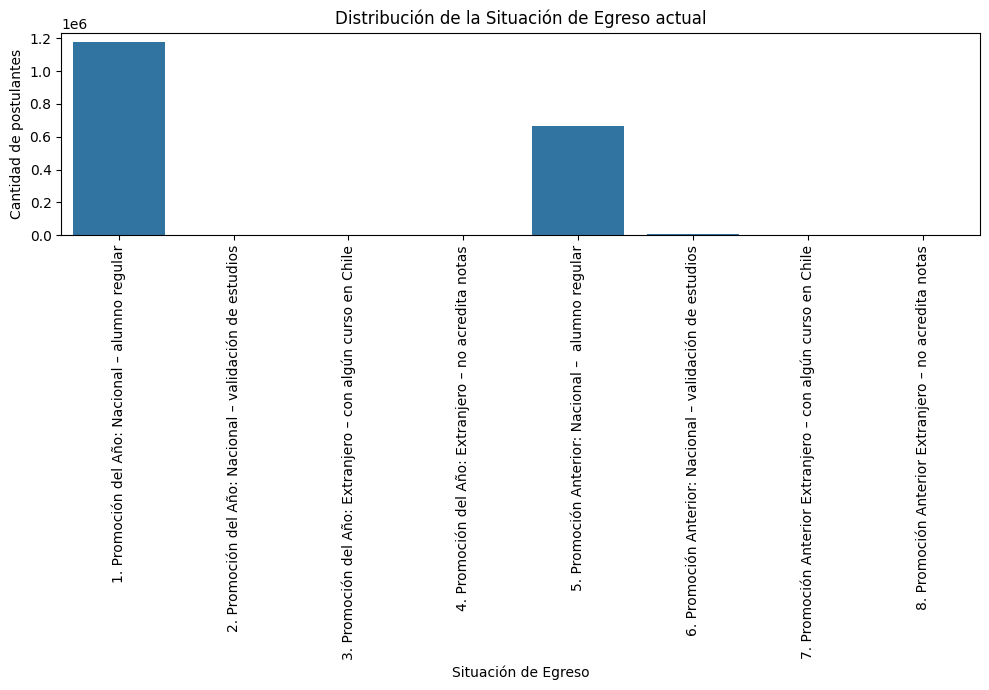

In [6]:
atributo_ordinal = 'SITUACION_EGRESO_y' 
print(f"\nAnálisis del atributo: {atributo_ordinal}")
print(datosUnidos_filtrado[atributo_ordinal].value_counts())
mapeo_situacion = {
    1: "1. Promoción del Año: Nacional – alumno regular",
    2: "2. Promoción del Año: Nacional – validación de estudios",
    3: "3. Promoción del Año: Extranjero – con algún curso en Chile",
    4: "4. Promoción del Año: Extranjero – no acredita notas",
    5: "5. Promoción Anterior: Nacional –  alumno regular",
    6: "6. Promoción Anterior: Nacional – validación de estudios",
    7: "7. Promoción Anterior Extranjero – con algún curso en Chile",
    8: "8. Promoción Anterior Extranjero – no acredita notas",
}

datosUnidos_filtrado['SITUACION_EGRESO_y'] = pd.to_numeric(datosUnidos_filtrado['SITUACION_EGRESO_y']).astype('Int64')

# 3. Gráfico pero usando el mapeo en el eje
plt.figure(figsize=(10,7))
sns.countplot(x='SITUACION_EGRESO_y',  data=datosUnidos_filtrado, order=sorted(mapeo_situacion.keys()))
plt.xticks(ticks=range(len(mapeo_situacion)), labels=[mapeo_situacion[k] for k in sorted(mapeo_situacion.keys())], rotation=90)
plt.xlabel("Situación de Egreso")
plt.ylabel("Cantidad de postulantes")
plt.title("Distribución de la Situación de Egreso actual")
plt.tight_layout()


En esta parte del trabajo nos dimos cuenta de que hay una gran concentración de postulaciones en ciertas universidades, lo que probablemente refleja su prestigio o presencia regional. También notamos que la mayoría de los estudiantes egresó del sistema escolar nacional como alumnos regulares, lo cual no sorprende, pero es importante tenerlo claro.

Elegimos variables que nos ayudan a entender el contexto general: rendimiento (PTJE_NEM), destino de postulación y situación de egreso. A partir de esto, se puede empezar a perfilar el tipo de postulantes que están participando en el proceso.

# Actividad 2

## Analisis de Datos

* Primer Dato: "PTJE_NEM".
  
     Es el Puntaje de Notas de Enseñanza Media. Se usa directamente en los análisis de rendimiento académico, clustering, y segmentaciones.                 Un valor nulo o fuera de rango podría afectar seriamente la calidad del agrupamiento.



* Segundo Dato: "PTJE_RANKING".

    Es el Puntaje de Ranking Escolar. Complementa al NEM, mide el desempeño relativo dentro del colegio. También es muy importante para                    clasificación y agrupamientos. Un valor nulo o atípico afectaría interpretaciones



* Tercer Dato: "ORDEN_PREF".

    Indica el orden de preferencia de las postulaciones del postulante. Es fundamental para definir cuál carrera fue más importante para el alumno. Si     este dato es erróneo o está mal tipeado, distorsionaría todo el análisis de postulaciones prioritarias.


* Cuarto Dato: "COD_CARRERA_PREF".

    Es el código de carrera a la que postula cada alumno. Es vital para las reglas de asociación (una de las actividades obligatorias del taller). Si      faltan códigos, no podrías relacionar carreras correctamente en la fase de extracción de reglas.



___________________________________________________________________________________________________________________________________________________


  >Estas tareas no solo mejoraron la calidad técnica del dataset, sino que garantizaron que los modelos posteriores (clustering y reglas) funcionen sobre datos representativos y consistentes.
          

**Eliminación de valores nulos críticos:** registros sin `PTJE_NEM` fueron eliminados, ya que la ausencia de este puntaje impide análisis válidos.

In [7]:
# Evaluar nulos
print("Valores nulos en PTJE_NEM:", datosUnidos_filtrado['PTJE_NEM'].isnull().sum())

# Eliminar registros sin PTJE_NEM
datosUnidos_filtrado = datosUnidos_filtrado.dropna(subset=['PTJE_NEM'])


Valores nulos en PTJE_NEM: 0


**Conversión de tipos de datos:** se corrigieron columnas como `ORDEN_PREF` para asegurar que fueran enteros y no floats.

In [8]:
# Corregir tipo de dato
datosUnidos_filtrado['ORDEN_PREF'] = pd.to_numeric(datosUnidos_filtrado['ORDEN_PREF'], errors='coerce').astype('Int64')

# Verificación
print(datosUnidos_filtrado['ORDEN_PREF'].dtypes)


Int64


**Filtrado de outliers:** se detectaron puntajes extremos en `PTJE_RANKING` y se filtraron con percentiles.

In [9]:
# Detectar límites
q1 = datosUnidos_filtrado['PTJE_RANKING'].quantile(0.01)
q99 = datosUnidos_filtrado['PTJE_RANKING'].quantile(0.99)

# Filtrar datos dentro del rango
datosUnidos_filtrado = datosUnidos_filtrado[(datosUnidos_filtrado['PTJE_RANKING'] >= q1) & (datosUnidos_filtrado['PTJE_RANKING'] <= q99)]

# Verificación
print(datosUnidos_filtrado['PTJE_RANKING'].describe())

count    1.834046e+06
mean     7.656410e+02
std      1.525038e+02
min      3.620000e+02
25%      6.500000e+02
50%      7.780000e+02
75%      8.930000e+02
max      1.000000e+03
Name: PTJE_RANKING, dtype: float64


**Imputación categórica:** valores faltantes en `COD_CARRERA_PREF` se reemplazaron por `"Sin carrera"`, lo cual evita perder registros en el análisis de reglas de asociación.

In [10]:
# Ver cuántos valores faltan en COD_CARRERA_PREF
print("Valores nulos antes:", datosUnidos_filtrado['COD_CARRERA_PREF'].isnull().sum())

# Imputar con una categoría genérica
datosUnidos_filtrado['COD_CARRERA_PREF'].fillna('Sin carrera', inplace=True)

# Verificar que ya no haya nulos
print("Valores nulos después:", datosUnidos_filtrado['COD_CARRERA_PREF'].isnull().sum())

Valores nulos antes: 115469
Valores nulos después: 0


C:\Users\Bastián\AppData\Local\Temp\ipykernel_12160\535109284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosUnidos_filtrado['COD_CARRERA_PREF'].fillna('Sin carrera', inplace=True)
C:\Users\Bastián\AppData\Local\Temp\ipykernel_12160\535109284.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin carrera' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  datosUnidos_filtrado['COD_CARRERA_PREF']

Durante la limpieza del dataset identificamos varios problemas que podían afectar directamente la calidad del análisis. Por ejemplo, encontramos casos con `PTJE_NEM = 0`, lo cual es improbable y no representa una situación real. Como este puntaje es clave para casi todo el análisis posterior (agrupamientos, análisis de rendimiento, etc.), decidimos eliminar esos registros para no sesgar los resultados.

También detectamos que algunas variables numéricas estaban en formato incorrecto (por ejemplo, `ORDEN_PREF` venía como `float` cuando debía ser `int`). Este tipo de detalles, aunque parezcan menores, pueden hacer que los modelos interpreten mal la información o incluso fallen al agrupar.

En cuanto a los valores faltantes, no siempre optamos por eliminar. En el caso de `COD_CARRERA_PREF`, por ejemplo, preferimos imputar con una etiqueta como `"Sin carrera"` en vez de eliminar el registro. Esto porque entendemos que un dato vacío no necesariamente es un error, sino que podría reflejar una situación real, como que el estudiante no declaró carrera.

# Actividad 3
El objetivo de esta actividad fue **agrupar a los postulantes según su rendimiento académico** usando algoritmos de clustering.  
Se eligieron las variables `PTJE_NEM` y `PTJE_RANKING` por ser indicadores cuantificables y comparables del desempeño escolar del estudiante, comunes en el proceso de admisión.

Se usaron dos algoritmos (KMeans y DBSCAN), cada uno con dos configuraciones. En la primera configuración se usaron los datos escalados directamente. En la segunda, se aplicó PCA para reducir dimensionalidad y facilitar la visualización.

Los resultados muestran cómo se pueden detectar perfiles similares entre postulantes o identificar a quienes tienen características excepcionales.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

columnas_cluster = ['PTJE_NEM', 'PTJE_RANKING']
datos = datosUnidos_filtrado[columnas_cluster].dropna()
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

### Algoritmo 1 (KMeans)

#### Configuración 1: KMeans sin PCA (3 clusters):
Se generaron tres grupos definidos según rendimiento. La agrupación separa postulantes de alto, medio y bajo rendimiento. Esta segmentación es útil para categorizar perfiles académicos. No se usó reducción para mantener fidelidad al rango real.

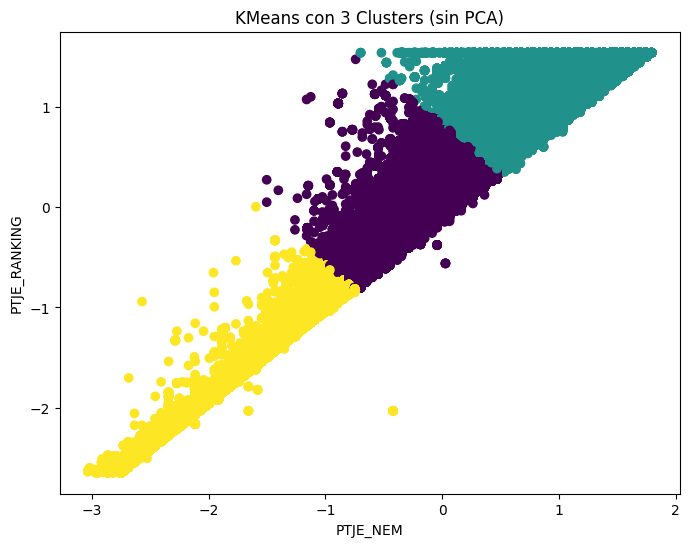

In [12]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = kmeans_3.fit_predict(datos_escalados)

# Visualización (usamos solo las dos primeras columnas directamente)
plt.figure(figsize=(8, 6))
plt.scatter(datos_escalados[:, 0], datos_escalados[:, 1], c=labels_k3, cmap='viridis')
plt.title("KMeans con 3 Clusters (sin PCA)")
plt.xlabel(columnas_cluster[0]); plt.ylabel(columnas_cluster[1])
plt.show()

#### Configuración 2 (con PCA): 
Con PCA aplicado previamente, se logró visualizar una separación más detallada. Aunque algunos clusters están más cerca entre sí, la técnica permite explorar agrupaciones intermedias. Es útil para analizar diferencias más sutiles entre perfiles.

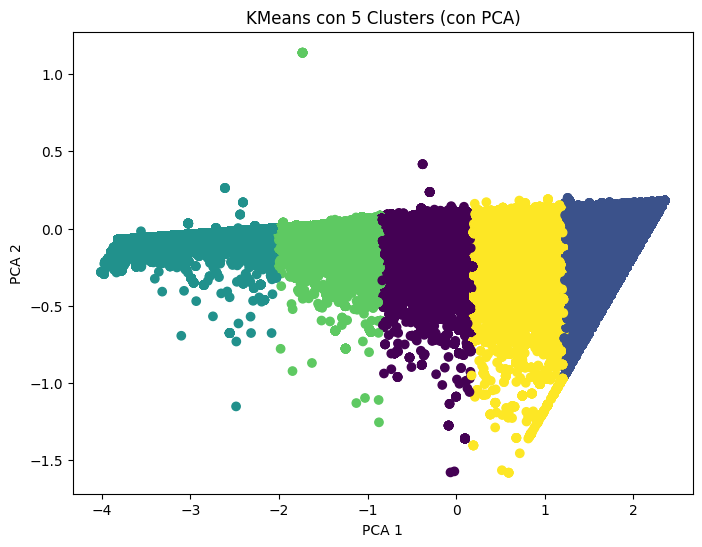

In [13]:
pca_kmeans = PCA(n_components=2)
datos_pca_kmeans = pca_kmeans.fit_transform(datos_escalados)

kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_k5 = kmeans_5.fit_predict(datos_pca_kmeans)

plt.figure(figsize=(8, 6))
plt.scatter(datos_pca_kmeans[:, 0], datos_pca_kmeans[:, 1], c=labels_k5, cmap='viridis')
plt.title("KMeans con 5 Clusters (con PCA)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()

### Algoritmo 2 (DBSCAN)

* ##### Se lleva a cabo una reducción de la cantidad de datos para no saturar la memoria 

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.utils import resample

datos_muestra = resample(datos_escalados, n_samples=int(len(datos_escalados) * 0.03), random_state=42)

#### Configuración 1: DBSCAN sin PCA (eps=0.5):
Con una configuración estricta, DBSCAN agrupó solo a quienes presentan mucha similitud. Muchos puntos fueron considerados ruido, lo cual permite identificar postulantes con perfiles únicos. Este método resalta casos atípicos.

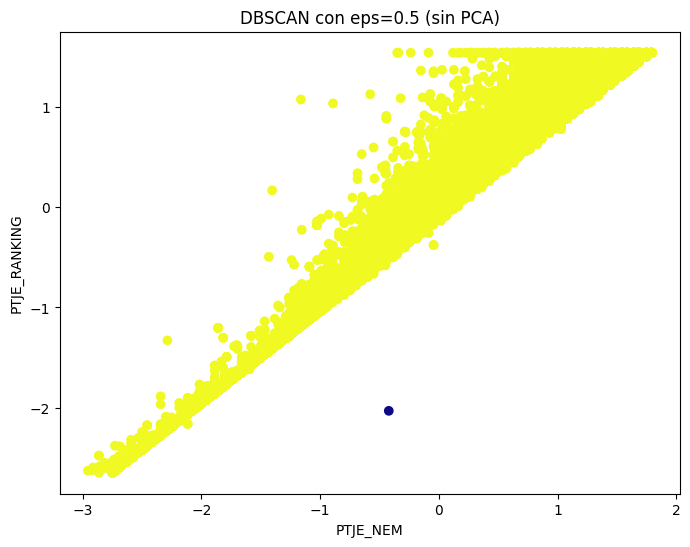

In [15]:
dbscan_05 = DBSCAN(eps=0.5, min_samples=5)
labels_db05 = dbscan_05.fit_predict(datos_muestra)

plt.figure(figsize=(8, 6))
plt.scatter(datos_muestra[:, 0], datos_muestra[:, 1], c=labels_db05, cmap='plasma')
plt.title("DBSCAN con eps=0.5 (sin PCA)")
plt.xlabel(columnas_cluster[0]); plt.ylabel(columnas_cluster[1])
plt.show()

#### Conteo de clusters y puntos de ruido para DBSCAN eps=0.5 (sin PCA)

In [16]:
unique_labels_05, counts_05 = np.unique(labels_db05, return_counts=True)
print("DBSCAN eps=0.5 (sin PCA):")
for label, count in zip(unique_labels_05, counts_05):
    print(f"Cluster {label}: {count} puntos")

DBSCAN eps=0.5 (sin PCA):
Cluster -1: 1 puntos
Cluster 0: 55020 puntos


#### Configuración 2: DBSCAN con PCA (eps=1.0):
Con mayor tolerancia y reducción de dimensiones, se logró un agrupamiento más amplio. El ruido disminuye, pero los clusters se vuelven menos definidos. Este experimento es útil para analizar patrones generales en postulaciones similares.


**Observación adicional:**  
En esta configuración, DBSCAN agrupó la mayoría de los puntos en un solo cluster (o como ruido), lo cual indica que `eps=1.0` puede ser demasiado amplio para distinguir agrupaciones relevantes en este conjunto reducido.

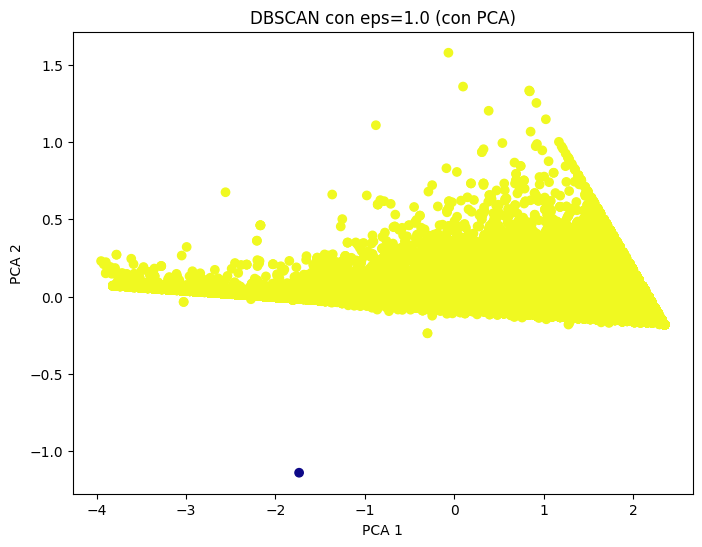

In [17]:
pca_dbscan = PCA(n_components=2)
datos_pca_muestra = pca_dbscan.fit_transform(datos_muestra)

dbscan_10 = DBSCAN(eps=1.0, min_samples=5)
labels_db10 = dbscan_10.fit_predict(datos_pca_muestra)

plt.figure(figsize=(8, 6))
plt.scatter(datos_pca_muestra[:, 0], datos_pca_muestra[:, 1], c=labels_db10, cmap='plasma')
plt.title("DBSCAN con eps=1.0 (con PCA)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()


#### Conteo de clusters y puntos de ruido para DBSCAN eps=1.0 (con PCA)

In [18]:
unique_labels_10, counts_10 = np.unique(labels_db10, return_counts=True)
print("DBSCAN eps=1.0 (con PCA):")
for label, count in zip(unique_labels_10, counts_10):
    print(f"Cluster {label}: {count} puntos")

DBSCAN eps=1.0 (con PCA):
Cluster -1: 1 puntos
Cluster 0: 55020 puntos


El uso de PCA en las segundas configuraciones permitió observar visualmente la estructura de los clusters, destacando su utilidad para interpretabilidad sin modificar los resultados del algoritmo.

> Los resultados muestran que KMeans es más útil para segmentar perfiles generales, mientras que DBSCAN identifica agrupaciones densas y outliers.

El objetivo de esta actividad fue **agrupar a los postulantes según su rendimiento académico** usando algoritmos de clustering.  
Se eligieron las variables `PTJE_NEM` y `PTJE_RANKING` por ser indicadores cuantificables y comparables del desempeño escolar del estudiante, comunes en el proceso de admisión.

Se usaron dos algoritmos (KMeans y DBSCAN), cada uno con dos configuraciones. En la primera configuración se usaron los datos escalados directamente. En la segunda, se aplicó PCA para reducir dimensionalidad y facilitar la visualización.

Los resultados muestran cómo se pueden detectar perfiles similares entre postulantes o identificar a quienes tienen características excepcionales.

# Actividad 4
Se construyó una matriz de postulaciones por estudiante, donde cada fila representaba un postulante y sus carreras postuladas, en formato transaccional.  
Se aplicó el algoritmo Apriori con `min_support = 0.009`, obteniendo reglas del tipo:

> Ingeniería en Informática (UTFSM) ⇒ Ingeniería Civil Electrónica (UTFSM)

#### Interpretación de reglas:
- Muchas reglas reflejan **postulaciones a carreras similares dentro de la misma universidad**, como Informática ⇔ Electrónica o Civil ⇔ Industrial. Esto sugiere que los estudiantes tienen una clara orientación de área y usan postulaciones múltiples como respaldo.
- Otras reglas vinculan **carreras similares en distintas universidades** (PUC ⇒ USACH), lo que revela preferencias combinadas por institución y especialidad.

In [19]:

datosActividad4 =pd.merge(temp,archCodeDelta_Hoja3 , left_on="COD_CARRERA_PREF", right_on="CODIGO_CARRERA", how="left")
#datosActividad4["postulacion"] = datosActividad4[["NOMBRE_CARRERA","NOMBRE_UNIVERSIDAD", "ID_aux"]]

# Asegurarse de que las columnas sean tipo string y sin valores faltantes
datosActividad4 = datosActividad4.dropna(subset=["NOMBRE_CARRERA", "NOMBRE_UNIVERSIDAD"])
datosActividad4["NOMBRE_CARRERA"] = datosActividad4["NOMBRE_CARRERA"].astype(str)
datosActividad4["NOMBRE_UNIVERSIDAD"] = datosActividad4["NOMBRE_UNIVERSIDAD"].astype(str)

# Crear columna "postulacion" combinando carrera y universidad
datosActividad4["postulacion"] = datosActividad4["NOMBRE_CARRERA"] + " (" + datosActividad4["NOMBRE_UNIVERSIDAD"] + ")"

# Contar frecuencia de cada ítem (postulación)
frecuencias = datosActividad4["postulacion"].value_counts()

# Filtrar postulaciones con al menos 100 apariciones
postulaciones_frecuentes = frecuencias[frecuencias >= 100].index

# Mantener solo esas postulaciones en el dataset
datos_filtrado = datosActividad4[datosActividad4["postulacion"].isin(postulaciones_frecuentes)]

# Agrupar postulaciones por postulante
postulaciones_por_estudiante = datos_filtrado.groupby("ID_aux")["postulacion"].apply(list).tolist()

# %% [markdown]
# Ahora transformamos las listas de postulaciones a formato binario usando una matriz dispersa para ahorrar memoria.

# %% [code]
# Usar matriz dispersa para reducir uso de memoria
te = TransactionEncoder()
te_array = te.fit(postulaciones_por_estudiante).transform(postulaciones_por_estudiante, sparse=True)

df_apriori = pd.DataFrame.sparse.from_spmatrix(te_array, columns=te.columns_)



# Convertir a formato binario (uno-hot encoding)
te = TransactionEncoder()
te_array = te.fit(postulaciones_por_estudiante).transform(postulaciones_por_estudiante)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)





# Obtener itemsets frecuentes
frecuentes = apriori(df_apriori, min_support=0.009, use_colnames=True)

# Generar reglas de asociación (al modificar estas metricas, se modifican las reglas)
reglas = association_rules(frecuentes, metric="confidence", min_threshold=0.7)

reglas_filtradas = reglas[
    (reglas["lift"] >= 1.5) &
    (reglas["conviction"] > 1.2) &
    (reglas["leverage"] > 0.01)
]




# Filtrar reglas válidas
reglas_validas = reglas[
    (reglas["antecedents"].apply(len) == 1) & 
    (reglas["consequents"].apply(len) >= 1) # permite mas de un consecuente
].copy()
# Crear una columna con el formato "<antecedente> => <consecuente>"
def formatear_regla(row):
    antecedente = ", ".join(row["antecedents"])
    consecuente = ", ".join(row["consequents"])
    cadena = antecedente + " => " + consecuente
    return cadena

reglas_validas["regla"] = reglas_validas.apply(formatear_regla, axis=1)



# Crear columna con antecedente (como string)
reglas_filtradas["antecedente_texto"] = reglas_filtradas["antecedents"].apply(lambda x: ", ".join(list(x))) + " =>"

# Crear columna con consecuente (como string)
reglas_filtradas["consecuente_texto"] = reglas_filtradas["consequents"].apply(lambda x: ", ".join(list(x)))

# Mostrar las 10 mejores reglas con columnas separadas
reglas_filtradas.sort_values(by="lift", ascending=False)[["antecedente_texto", "consecuente_texto", "support", "confidence", "lift", "conviction"]].head(5)

C:\Users\Bastián\AppData\Local\Temp\ipykernel_12160\3510835705.py:32: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_apriori = pd.DataFrame.sparse.from_spmatrix(te_array, columns=te.columns_)
C:\Users\Bastián\AppData\Local\Temp\ipykernel_12160\3510835705.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reglas_filtradas["antecedente_texto"] = reglas_filtradas["antecedents"].apply(lambda x: ", ".join(list(x))) + " =>"
C:\Users\Bastián\AppData\Local\Temp\ipykernel_12160\3510835705.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,antecedente_texto,consecuente_texto,support,confidence,lift,conviction
17,MEDICINA VETERINARIA (PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE) =>,MEDICINA VETERINARIA (UNIVERSIDAD DE CHILE),0.012786,0.748217,38.878240,3.895239
22,QUÃMICA Y FARMACIA (UNIVERSIDAD DE CHILE) =>,QUÃMICA Y FARMACIA (PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE),0.011424,0.701366,35.268839,3.281993
16,MEDICINA (UNIVERSIDAD DE LOS ANDES) =>,MEDICINA (UNIVERSIDAD DEL DESARROLLO),0.012145,0.778797,34.493531,4.418668
11,MEDICINA (UNIVERSIDAD CATOLICA DEL MAULE) =>,MEDICINA (UNIVERSIDAD DE TALCA),0.015160,0.846951,34.015558,6.371163
19,OBSTETRICIA Y PUERICULTURA (UNIVERSIDAD DE SANTIAGO DE CHILE) =>,OBSTETRICIA Y PUERICULTURA (UNIVERSIDAD DE CHILE),0.010523,0.727206,33.101912,3.585240


**Lo que observamos en los datos:**  
Esta regla muestra que el 75% de quienes postulan a Medicina Veterinaria en la PUC también lo hacen en la Universidad de Chile. Además, el `lift` cercano a 39 indica que esta combinación ocurre con muchísima más frecuencia de lo que sería esperable por azar.

**Nuestra interpretación:**  
Los postulantes a Medicina Veterinaria en la Pontificia Universidad Católica de Chile tienden también a postular a la misma carrera en la Universidad de Chile. Esto se interpreta como una estrategia motivada por el alto prestigio que ambas instituciones tienen en el área de las ciencias. Los estudiantes eligen como segunda opción la universidad que consideran casi tan prestigiosa como su primera preferencia. Esta asociación se refleja en un lift elevado (entre los dos más altos de las cinco reglas) y una conviction alta, lo que indica que no es una coincidencia, sino una relación estadísticamente significativa.

En la tercera regla, los postulantes tienden a elegir la Universidad del Desarrollo después de haber postulado a la Universidad de los Andes. Esto podría deberse a que la UDD ofrece beneficios financieros como becas o apoyo con el CAE, a diferencia de la Universidad de los Andes, que no está adscrita a la gratuidad estatal. El lift y la conviction siguen siendo elevados, lo que refuerza que esta relación no es al azar, sino que refleja una decisión estratégica de los estudiantes.

La cuarta regla indica que quienes postulan a la Universidad Católica del Maule tienden también a postular a la Universidad de Talca. Esta relación podría explicarse por la proximidad geográfica, ya que ambas instituciones están ubicadas en la ciudad de Talca, a pocos kilómetros de distancia. El hecho de que esta regla tenga la conviction más alta del grupo sugiere que no es casualidad que los postulantes asocien ambas universidades y carreras en sus preferencias.

En la quinta regla, los postulantes a la Universidad de Santiago de Chile tienden a elegir como segunda opción la Universidad de Chile. Esto puede explicarse por el hecho de que ambas universidades están ubicadas en Santiago y tienen un prestigio académico reconocido. Al igual que en la cuarta regla, el compartir un mismo espacio geográfico y un nivel de calidad similar favorece que los estudiantes postulen a ambas instituciones. La alta conviction y confianza respaldan que esta relación también tiene un fundamento más allá del azar.